In [7]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from matplotlib import image
from matplotlib import pyplot as plt
import os
from tensorflow import keras
tf.config.run_functions_eagerly(True)

# DATASET

In [8]:
batch_size = 16
SIZE = 128

imgs_input_path = '/kaggle/input/dataset-4-frame-prediction1/ourDataset/input'
imgs_target_path = '/kaggle/input/dataset-4-frame-prediction1/ourDataset/target'

def load_images(data_path):
    array_data = []
    for image_file in os.listdir( data_path ):
        image = Image.open( os.path.join( data_path , image_file ) ).resize( ( SIZE , SIZE ) )
        # Normalize the image array
        img_input_array = (np.asarray( image ) ) / 255
        # Append the image
        array_data.append( img_input_array )
    
    return array_data

imgs_input = load_images(imgs_input_path)
imgs_target = load_images(imgs_target_path)

# Train-test splitting
train_x, test_x, train_y, test_y = train_test_split( np.array(imgs_input) , np.array(imgs_target) , test_size=0.1 )

# Construct tf.data.Dataset object
dataset = tf.data.Dataset.from_tensor_slices( ( train_x , train_y ) )
dataset = dataset.batch( batch_size )

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 8)       

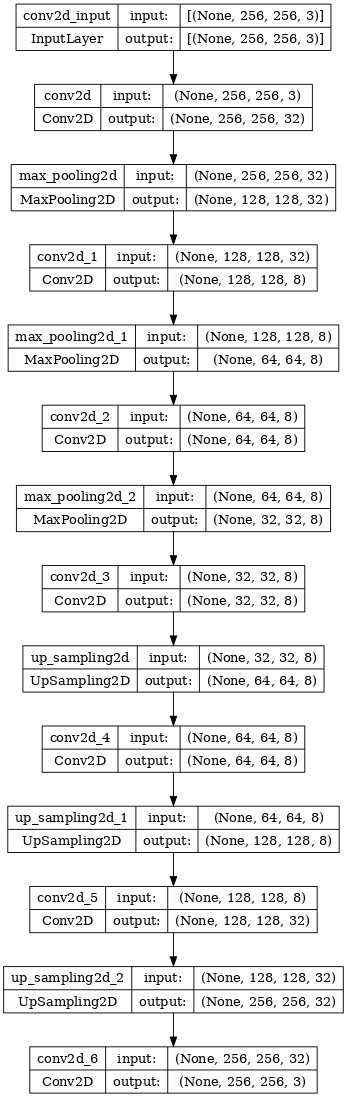

In [20]:
plot_model(model, to_file='AE.png', show_shapes=True, show_layer_names=True, dpi=66)

In [ ]:
model.fit(train_x, train_y,
        epochs=5000,
        shuffle=True) 

Epoch 1/5000


/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 1s 1s/step - loss: 0.2779 - accuracy: 0.0979
Epoch 2/5000
1/1 [==============================] - 1s 975ms/step - loss: 0.2504 - accuracy: 0.0977
Epoch 3/5000
1/1 [==============================] - 1s 935ms/step - loss: 0.2281 - accuracy: 0.0977
Epoch 4/5000
1/1 [==============================] - 1s 925ms/step - loss: 0.2291 - accuracy: 0.0977
Epoch 5/5000
1/1 [==============================] - 1s 883ms/step - loss: 0.2390 - accuracy: 0.0977
Epoch 6/5000
1/1 [==============================] - 1s 940ms/step - loss: 0.2311 - accuracy: 0.0977
Epoch 7/5000
1/1 [==============================] - 1s 891ms/step - loss: 0.2225 - accuracy: 0.0977
Epoch 8/5000
1/1 [==============================] - 1s 920ms/step - loss: 0.2169 - accuracy: 0.0977
Epoch 9/5000
1/1 [==============================] - 1s 925ms/step - loss: 0.2091 - accuracy: 0.0977
Epoch 10/5000
1/1 [==============================] - 1s 953ms/step - loss: 0.1996 - accuracy: 0.0977
Epoch 11/5000
1

In [23]:
model.save("oneFrame.h5")

In [29]:
SIZE=128  #Limiting to 256 size image as my laptop cannot handle larger images. 
img_data=[]

img=cv2.imread('/kaggle/input/test-dataset/lina_stand.jpeg', 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


img_data2=[]  #Second image to be provided as ground truth. 

img2=cv2.imread('/kaggle/input/test-dataset/lina_walk.jpeg', 1)   #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

In [21]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 42ms/step


In [30]:
model.fit(img_array, img_array2,
        epochs=10000,
        shuffle=True) 

Epoch 1/1000
1/1 [==============================] - 0s 144ms/step - loss: 0.0408 - accuracy: 0.6266
Epoch 2/1000
1/1 [==============================] - 0s 115ms/step - loss: 0.1893 - accuracy: 0.7882
Epoch 3/1000
1/1 [==============================] - 0s 117ms/step - loss: 0.0431 - accuracy: 0.6379
Epoch 4/1000
1/1 [==============================] - 0s 115ms/step - loss: 0.0658 - accuracy: 0.6376
Epoch 5/1000
1/1 [==============================] - 0s 118ms/step - loss: 0.0582 - accuracy: 0.6655
Epoch 6/1000
1/1 [==============================] - 0s 119ms/step - loss: 0.0612 - accuracy: 0.5615
Epoch 7/1000
1/1 [==============================] - 0s 117ms/step - loss: 0.0888 - accuracy: 0.6259
Epoch 8/1000
1/1 [==============================] - 0s 122ms/step - loss: 0.0355 - accuracy: 0.3270
Epoch 9/1000
1/1 [==============================] - 0s 122ms/step - loss: 0.0414 - accuracy: 0.3447
Epoch 10/1000
1/1 [==============================] - 0s 119ms/step - loss: 0.0414 - accuracy: 0.3517

In [32]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 47ms/step


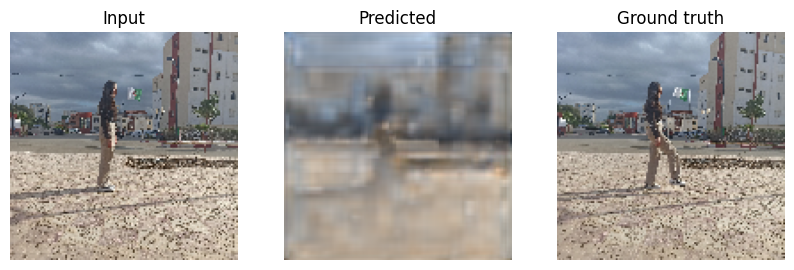

In [34]:
from matplotlib import pyplot as plt 

fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(2, 3, 1) 
  
# showing image 
plt.imshow(img_test.reshape(SIZE,SIZE,3)) 
plt.axis('off') 
plt.title("Input") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(2, 3, 2) 
  
# showing image 
plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray") 
plt.axis('off') 
plt.title("Predicted") 

# Adds a subplot at the 2nd position 
fig.add_subplot(2, 3, 3) 
  
# showing image 
plt.imshow(img_gt.reshape(SIZE,SIZE,3), cmap="gray") 
plt.axis('off') 
plt.title("Ground truth") 
plt.savefig("results.png")

In [36]:
from keras.models import load_model
model = load_model('oneFrame.h5')

In [37]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 44ms/step


/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


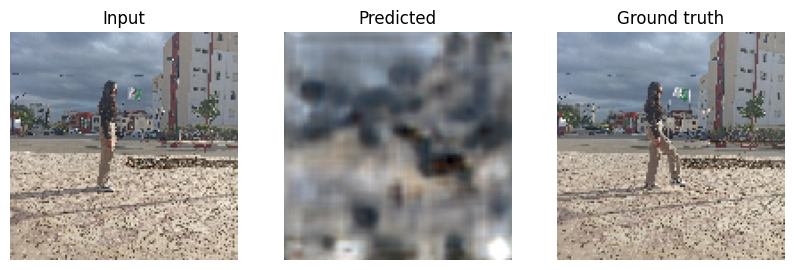

In [38]:
from matplotlib import pyplot as plt 

fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(2, 3, 1) 
  
# showing image 
plt.imshow(img_test.reshape(SIZE,SIZE,3)) 
plt.axis('off') 
plt.title("Input") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(2, 3, 2) 
  
# showing image 
plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray") 
plt.axis('off') 
plt.title("Predicted") 

# Adds a subplot at the 2nd position 
fig.add_subplot(2, 3, 3) 
  
# showing image 
plt.imshow(img_gt.reshape(SIZE,SIZE,3), cmap="gray") 
plt.axis('off') 
plt.title("Ground truth") 
plt.savefig("results.png")